# DATASET - Alquileres AIRBNB en Europa

**Descripción:**
Departamentos en alquiler en AIRBNB en Europa, en función de tipo de las características del local.

**Variables de interés:**
Ciudad, Precio, Tipo, Capacidad, Distancias a puntos de interés, Distancias al metro

**Fuente:** 
https://www.kaggle.com/datasets/dipeshkhemani/airbnb-cleaned-europe-dataset

**Objetivo:**
Intentaremos buscar una relación entre el precio y las demás variables, en particular 'distancia al centro' y 'capacidad de personas'

In [182]:
import numpy as np
import pandas as pd
import requests
from io import StringIO

url = 'https://raw.githubusercontent.com/tekluis/CoderHouse/main/Aemf.csv'
response = requests.get(url).text
csv_data = StringIO(response)

df = pd.read_csv(csv_data)
print("Cantidad de filas:", df.shape[0])
print("Cantidad de columnas:", df.shape[1])
print("Primeras 5 filas del dataframe")
df.head()

Cantidad de filas: 41714
Cantidad de columnas: 19
Primeras 5 filas del dataframe


,City,Price,Day,Room Type,Shared Room,Private Room,Person Capacity,Superhost,Multiple Rooms,Business,Cleanliness Rating,Guest Satisfaction,Bedrooms,City Center (km),Metro Distance (km),Attraction Index,Normalised Attraction Index,Restraunt Index,Normalised Restraunt Index
0,Amsterdam,194.033698,Weekday,Private room,False,True,2,False,1,0,10,93,1,5.022964,2.539380,78.690379,4.166708,98.253896,6.846473
1,Amsterdam,344.245776,Weekday,Private room,False,True,4,False,0,0,8,85,1,0.488389,0.239404,631.176378,33.421209,837.280757,58.342928
2,Amsterdam,264.101422,Weekday,Private room,False,True,2,False,0,1,9,87,1,5.748312,3.651621,75.275877,3.985908,95.386955,6.646700
3,Amsterdam,433.529398,Weekday,Private room,False,True,4,False,0,1,9,90,2,0.384862,0.439876,493.272534,26.119108,875.033098,60.973565
4,Amsterdam,485.552926,Weekday,Private room,False,True,2,True,0,0,10,98,1,0.544738,0.318693,552.830324,29.272733,815.305740,56.811677


Como primer gráfico haremos uno de puntos para tratar de obtener una relación entre el precio de alquiler y la distancia al centro.

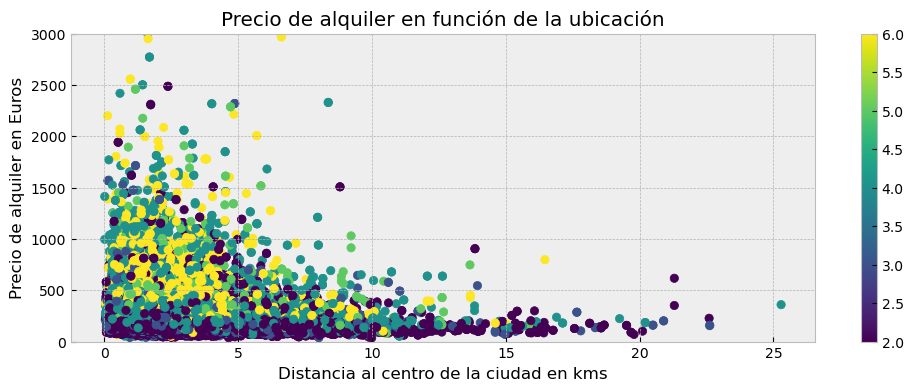

In [183]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

mpl.style.use('bmh')

x=df['City Center (km)']
y=df['Price']

fig, ax = plt.subplots(figsize=(12, 4))
mapeo_colores = ax.scatter(x, y, c=df['Person Capacity'])
fig.colorbar(mapeo_colores)

ax.set_ylim(0, 3000)

ax.set_title('Precio de alquiler en función de la ubicación')
ax.set_xlabel('Distancia al centro de la ciudad en kms')
ax.set_ylabel('Precio de alquiler en Euros')

plt.show()



Como puede verse en el gráfico anterior, hay una relación inversa entre el precio y la distancia al centro. 
Los locales más cercanos al centro tienen precios más elevados (cerca de 3.000 euros), mientras que los más alejados van disminuyendo el precio (los que están a 10kms valen abajo de 1.000 euros y los que están a 20kms valen abajo de 500 euros)

Por otra parte, puede verse que los locales con mayor capacidad tiene mayor precio que los de menor capacidad. 
Los que albergan entre 5 y 6 personas están de color verde y amarillo, mientrasa que los que albergan entre 2 y 4 personas están de color violeta y azul.

Para poder apreciar mejor la relación entre precio y capacidad haremos un gráfico de barras.

Text(0.5, 0, 'Capacidad de personas del local')

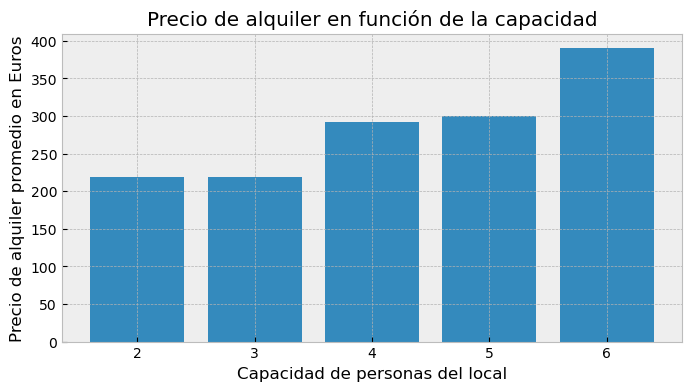

In [184]:
fig, ax = plt.subplots(figsize=(8,4))
precio_por_capacidad = df.groupby('Person Capacity')['Price'].mean()

ax.bar(precio_por_capacidad.index, precio_por_capacidad)
ax.set_title('Precio de alquiler en función de la capacidad')
ax.set_ylabel('Precio de alquiler promedio en Euros')
ax.set_xlabel('Capacidad de personas del local')

En el gráfico anterior puede verse claramente que a medida que aumenta la capacidad del local, el valor promedio de alquiler aumenta. 
Los locales de capacidad para 2 y 3 personas tienen un valor promedio menor a 250 euros. 
Los locales de capcidad para 4 y 5 personas tienen un valor promedio de 300 euros.
Mientras que los locales de 6 personas alcanzan un promedio cercano a los 400 euros.

Para entender mejor la relación entre precio y capacidad del local, repetiremos el gráfico anterior pero esta vez usaremos un gráfico de caja

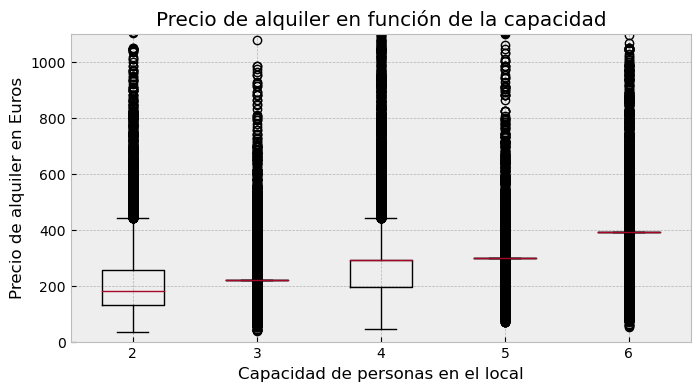

In [196]:

precio_capacidad=df[['Price','Person Capacity']]

precio_2pers = precio_capacidad[precio_capacidad['Person Capacity']==2].Price.values
precio_3pers = precio_capacidad[precio_capacidad['Person Capacity']==3].Price.values
precio_4pers = precio_capacidad[precio_capacidad['Person Capacity']==4].Price.values
precio_5pers = precio_capacidad[precio_capacidad['Person Capacity']==5].Price.values
precio_6pers = precio_capacidad[precio_capacidad['Person Capacity']==6].Price.values

precio_2pers_completo = precio_2pers
precio_3pers_completo = np.concatenate([precio_3pers, np.full((12834,), precio_3pers.mean())])
precio_4pers_completo = np.concatenate([precio_4pers, np.full((5964,), precio_4pers.mean())])
precio_5pers_completo = np.concatenate([precio_5pers, np.full((15584,), precio_5pers.mean())])
precio_6pers_completo = np.concatenate([precio_6pers, np.full((14534,), precio_6pers.mean())])

data = {'2pers':precio_2pers_completo, '3pers':precio_3pers_completo, '4pers':precio_4pers_completo, 
        '5pers':precio_5pers_completo, '6pers':precio_6pers_completo}

nuevo_df=pd.DataFrame(data)

fig, ax = plt.subplots(figsize=(8,4))
ax.boxplot(nuevo_df)

ax.set_title('Precio de alquiler en función de la capacidad')
ax.set_xlabel('Capacidad de personas en el local')
ax.set_ylabel('Precio de alquiler en Euros')

ax.set_xticklabels([2,3,4,5,6])

ax.set_ylim(0, 1100)

plt.show()
